# RandomForests Classification Red Wine


In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn.metrics import plot_roc_curve
import matplotlib.pyplot as plt

# Ready CSV 

In [2]:
df = pd.read_csv("./Resources/Data/winequality-red-clean.csv", delimiter=',')
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,Fair
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,Fair
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,Fair
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,Fair
4,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.99780,3.51,0.56,9.4,Fair
...,...,...,...,...,...,...,...,...,...,...,...,...
1350,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,Fair
1351,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,Fair
1352,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,Fair
1353,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,Fair


# Select your features (columns)

In [3]:
# Set features. This will also be used as your x values.
X = df.drop(['quality'], axis = 1)
y = df['quality']
print(X.shape, y.shape)


(1355, 11) (1355,)


# Create a Train Test Split

In [4]:
X_train, X_, y_train, y_ = train_test_split(X,y,train_size=.7,random_state=3)
X_val,X_test, y_val, y_test = train_test_split(X_,y_,test_size=.33,random_state=3)

print(X_train.shape, X_val.shape, X_test.shape, y_train.shape, y_val.shape, y_test.shape)

(948, 11) (272, 11) (135, 11) (948,) (272,) (135,)


# Train the Model

--------
1
RandomForestClassifier(criterion='entropy', n_jobs=-1, oob_score=True)
k: 1, Train/Test Score: 1.000/0.871
OOB_Score : 0.8723628691983122
--------
2
RandomForestClassifier(criterion='entropy', min_samples_leaf=2, n_jobs=-1,
                       oob_score=True)
k: 2, Train/Test Score: 0.988/0.860
OOB_Score : 0.8755274261603375
--------
3
RandomForestClassifier(criterion='entropy', min_samples_leaf=3, n_jobs=-1,
                       oob_score=True)
k: 3, Train/Test Score: 0.973/0.871
OOB_Score : 0.8734177215189873
--------
4
RandomForestClassifier(criterion='entropy', min_samples_leaf=4, n_jobs=-1,
                       oob_score=True)
k: 4, Train/Test Score: 0.957/0.864
OOB_Score : 0.879746835443038
--------
5
RandomForestClassifier(criterion='entropy', min_samples_leaf=5, n_jobs=-1,
                       oob_score=True)
k: 5, Train/Test Score: 0.950/0.879
OOB_Score : 0.8713080168776371
--------
6
RandomForestClassifier(criterion='entropy', min_samples_leaf=6, n_jobs=-1

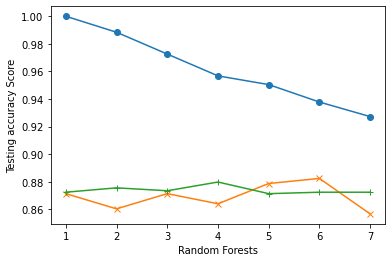

In [5]:
#Train your first model with choosen parameters

train_scores = []
val_scores = []
oob_scores = []
for k in range(1, 8, 1):
    rf = RandomForestClassifier(n_estimators=100,
                                min_samples_leaf=k,
                                n_jobs=-1,
                                oob_score=True,
                                criterion='entropy')

    print("--------")
    print(k)
    print(rf)
    rf = rf.fit(X_train, y_train)
    train_score = rf.score(X_train, y_train)
    val_score = rf.score(X_val, y_val)
    oob_score = rf.oob_score_
    train_scores.append(train_score)
    val_scores.append(val_score)
    oob_scores.append(oob_score)
    print(f"k: {k}, Train/Val Score: {train_score:.3f}/{val_score:.3f}")
    print(f"OOB_Score : {rf.oob_score_}")

plt.plot(range(1, 8, 1), train_scores, marker='o')
plt.plot(range(1, 8, 1), val_scores, marker="x")
plt.plot(range(1, 8, 1), oob_scores, marker="+")
plt.xlabel("Random Forests")
plt.ylabel("Testing accuracy Score")
plt.show()

--------
1
RandomForestClassifier(n_jobs=-1, oob_score=True)
k: 1, Train/Test Score: 1.000/0.871
OOB_Score : 0.8670886075949367
--------
2
RandomForestClassifier(min_samples_leaf=2, n_jobs=-1, oob_score=True)
k: 2, Train/Test Score: 0.981/0.875
OOB_Score : 0.8776371308016878
--------
3
RandomForestClassifier(min_samples_leaf=3, n_jobs=-1, oob_score=True)
k: 3, Train/Test Score: 0.965/0.871
OOB_Score : 0.8755274261603375
--------
4
RandomForestClassifier(min_samples_leaf=4, n_jobs=-1, oob_score=True)
k: 4, Train/Test Score: 0.953/0.864
OOB_Score : 0.8765822784810127
--------
5
RandomForestClassifier(min_samples_leaf=5, n_jobs=-1, oob_score=True)
k: 5, Train/Test Score: 0.940/0.871
OOB_Score : 0.8713080168776371
--------
6
RandomForestClassifier(min_samples_leaf=6, n_jobs=-1, oob_score=True)
k: 6, Train/Test Score: 0.932/0.860
OOB_Score : 0.8755274261603375
--------
7
RandomForestClassifier(min_samples_leaf=7, n_jobs=-1, oob_score=True)
k: 7, Train/Test Score: 0.926/0.871
OOB_Score : 0.8

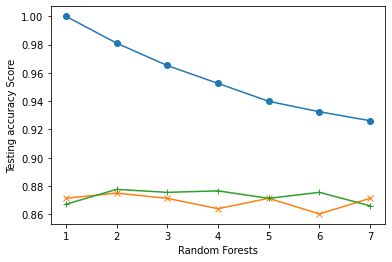

In [6]:
#Train your first model with choosen parameters

train_scores = []
val_scores = []
oob_scores = []
for k in range(1, 8, 1):
    rf = RandomForestClassifier(n_estimators=100,
                                min_samples_leaf=k,
                                n_jobs=-1,
                                oob_score=True,
                                criterion='gini')

    print("--------")
    print(k)
    print(rf)
    rf = rf.fit(X_train, y_train)
    train_score = rf.score(X_train, y_train)
    val_score = rf.score(X_val, y_val)
    oob_score = rf.oob_score_
    train_scores.append(train_score)
    val_scores.append(val_score)
    oob_scores.append(oob_score)
    print(f"k: {k}, Train/Val Score: {train_score:.3f}/{val_score:.3f}")
    print(f"OOB_Score : {rf.oob_score_}")

plt.plot(range(1, 8, 1), train_scores, marker='o')
plt.plot(range(1, 8, 1), val_scores, marker="x")
plt.plot(range(1, 8, 1), oob_scores, marker="+")
plt.xlabel("Random Forests")
plt.ylabel("Testing accuracy Score")
plt.show()

# Hyperparameter Tuning

Use `GridSearchCV` to tune the model's parameters

In [10]:
# Create the GridSearch estimator along with a parameter object containing the values to adjust
# Check it out how GridSearchCV can perform

param_grid = {'criterion':['gini','entropy'],
              'n_estimators':[100, 200],
              'min_samples_leaf':[1,2,3,4,5,6]}
              
                       
grid = GridSearchCV(rf, param_grid, verbose=3, return_train_score=True)


In [11]:
# Train the model with GridSearch
grid.fit(X_train, y_train)

Fitting 5 folds for each of 24 candidates, totalling 120 fits
[CV 1/5] END criterion=gini, min_samples_leaf=1, n_estimators=100;, score=(train=1.000, test=0.868) total time=   0.1s
[CV 2/5] END criterion=gini, min_samples_leaf=1, n_estimators=100;, score=(train=1.000, test=0.895) total time=   0.1s
[CV 3/5] END criterion=gini, min_samples_leaf=1, n_estimators=100;, score=(train=1.000, test=0.863) total time=   0.1s
[CV 4/5] END criterion=gini, min_samples_leaf=1, n_estimators=100;, score=(train=1.000, test=0.873) total time=   0.1s
[CV 5/5] END criterion=gini, min_samples_leaf=1, n_estimators=100;, score=(train=1.000, test=0.878) total time=   0.1s
[CV 1/5] END criterion=gini, min_samples_leaf=1, n_estimators=200;, score=(train=1.000, test=0.889) total time=   0.2s
[CV 2/5] END criterion=gini, min_samples_leaf=1, n_estimators=200;, score=(train=1.000, test=0.889) total time=   0.2s
[CV 3/5] END criterion=gini, min_samples_leaf=1, n_estimators=200;, score=(train=1.000, test=0.853) total

[CV 5/5] END criterion=entropy, min_samples_leaf=1, n_estimators=200;, score=(train=1.000, test=0.884) total time=   0.2s
[CV 1/5] END criterion=entropy, min_samples_leaf=2, n_estimators=100;, score=(train=0.992, test=0.874) total time=   0.1s
[CV 2/5] END criterion=entropy, min_samples_leaf=2, n_estimators=100;, score=(train=0.991, test=0.884) total time=   0.1s
[CV 3/5] END criterion=entropy, min_samples_leaf=2, n_estimators=100;, score=(train=0.989, test=0.853) total time=   0.1s
[CV 4/5] END criterion=entropy, min_samples_leaf=2, n_estimators=100;, score=(train=0.992, test=0.873) total time=   0.1s
[CV 5/5] END criterion=entropy, min_samples_leaf=2, n_estimators=100;, score=(train=0.993, test=0.884) total time=   0.1s
[CV 1/5] END criterion=entropy, min_samples_leaf=2, n_estimators=200;, score=(train=0.991, test=0.884) total time=   0.2s
[CV 2/5] END criterion=entropy, min_samples_leaf=2, n_estimators=200;, score=(train=0.995, test=0.884) total time=   0.2s
[CV 3/5] END criterion=e

GridSearchCV(estimator=RandomForestClassifier(min_samples_leaf=7, n_jobs=-1,
                                              oob_score=True),
             param_grid={'criterion': ['gini', 'entropy'],
                         'min_samples_leaf': [1, 2, 3, 4, 5, 6],
                         'n_estimators': [100, 200]},
             return_train_score=True, verbose=3)

In [12]:
print(grid.best_params_)
print(grid.best_score_)


{'criterion': 'entropy', 'min_samples_leaf': 5, 'n_estimators': 100}
0.8839877471456419


In [13]:
results = pd.DataFrame(grid.cv_results_)
results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_min_samples_leaf,param_n_estimators,params,split0_test_score,split1_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.089560,0.011959,0.009817,0.000146,gini,1,100,"{'criterion': 'gini', 'min_samples_leaf': 1, '...",0.868421,0.894737,...,0.875528,0.010831,19,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
1,0.153145,0.008539,0.016748,0.000265,gini,1,200,"{'criterion': 'gini', 'min_samples_leaf': 1, '...",0.889474,0.889474,...,0.874464,0.013962,23,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
2,0.091110,0.019501,0.009786,0.000104,gini,2,100,"{'criterion': 'gini', 'min_samples_leaf': 2, '...",0.884211,0.878947,...,0.874470,0.007030,22,0.978892,0.988127,0.980211,0.985507,0.978920,0.982331,0.003785
3,0.149027,0.002283,0.016652,0.000096,gini,2,200,"{'criterion': 'gini', 'min_samples_leaf': 2, '...",0.878947,0.889474,...,0.877633,0.007051,14,0.985488,0.989446,0.981530,0.989460,0.980237,0.985232,0.003856
4,0.081636,0.002017,0.009786,0.000212,gini,3,100,"{'criterion': 'gini', 'min_samples_leaf': 3, '...",0.873684,0.878947,...,0.876580,0.002656,16,0.968338,0.967018,0.965699,0.961792,0.963109,0.965191,0.002424


In [ ]:
#Now that  found my best parameters I combine train and val and I do it one more time

In [14]:
#Choose the best parameter and run a final test from one of those:
#1 - Previous tuning or
#2 - GridSearch
best_rf = grid.best_estimator_ #Chose this because GridSearch got a 0.883 score
#best_rf = rf
print(best_rf)
#Run one more time on the train data
best_rf.fit(X_train, y_train)
print(f'Train Data: {best_rf.score(X_train, y_train), best_rf.score(X_val, y_val)}')
#Concatenate the train and test
X_train_c = pd.concat([X_train, X_val], ignore_index=True)
y_train_c = pd.concat([y_train, y_val], ignore_index=True)
best_rf.fit(X_train_c, y_train_c)
print(f'Train and Validation Data Concat: {best_rf.score(X_train_c,y_train_c)}')
print(f'Validation Data : {best_rf.score(X_val,y_val)}')
print(f'Final result Test Data: {best_rf.score(X_test,y_test)}')

RandomForestClassifier(criterion='entropy', min_samples_leaf=5, n_jobs=-1,
                       oob_score=True)
Train Data: (0.9440928270042194, 0.8713235294117647)
Train and Validation Data Concat: 0.9459016393442623
Validation Data : 0.9485294117647058
Final result Test Data: 0.9259259259259259


In [15]:
predictions = best_rf.predict(X_test)
actual = y_test.tolist()

pred_act=pd.DataFrame({"Prediction": predictions, "Actual": y_test}).reset_index(drop=True)


In [16]:
# Calculate classification report
y_names = ['Fair','Very Good']

print(classification_report(y_test, predictions,
                            target_names=y_names))

              precision    recall  f1-score   support

        Fair       0.93      0.99      0.96       121
   Very Good       0.83      0.36      0.50        14

    accuracy                           0.93       135
   macro avg       0.88      0.67      0.73       135
weighted avg       0.92      0.93      0.91       135



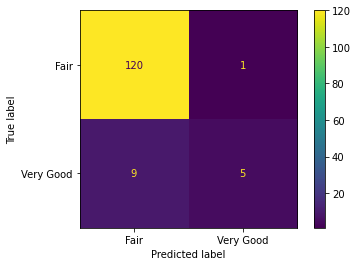

In [17]:
plot_confusion_matrix(best_rf, X_test, y_test)  
plt.show() 

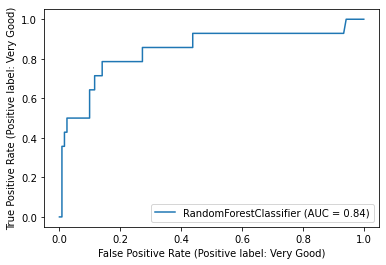

In [18]:
rf_disp = plot_roc_curve(best_rf, X_test, y_test)
plt.show()

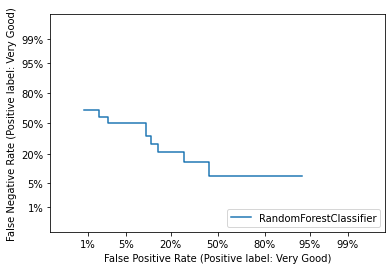

In [23]:
rf_disp = metrics.plot_det_curve(best_rf, X_test, y_test)  
plt.show()   

## Display features importance

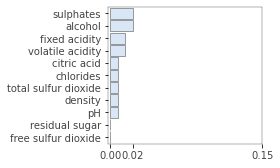

In [20]:
from rfpimp import *
imp = importances(best_rf, X_test, y_test, n_samples=-1)

viz = plot_importances(imp)
viz.view()

In [24]:
# Drop less import features
X = df.drop(['free sulfur dioxide','residual sugar', 'pH','quality'], axis = 1)
y = df['quality']
print(X.shape, y.shape)

(1355, 8) (1355,)


In [25]:
X_train, X_, y_train, y_ = train_test_split(X,y,train_size=.7,random_state=3)
X_val,X_test, y_val, y_test = train_test_split(X_,y_,test_size=.33,random_state=3)

print(X_train.shape, X_val.shape, X_test.shape, y_train.shape, y_val.shape, y_test.shape)

(948, 8) (272, 8) (135, 8) (948,) (272,) (135,)


In [26]:
best_rf = grid.best_estimator_ #Chose this because GridSearch got a 0.883 score
#best_rf = rf
print(best_rf)
#Run one more time on the train data
best_rf.fit(X_train, y_train)
print(f'Train Data: {best_rf.score(X_train, y_train), best_rf.score(X_val, y_val)}')
#Concatenate the train and test
X_train_c = pd.concat([X_train, X_val], ignore_index=True)
y_train_c = pd.concat([y_train, y_val], ignore_index=True)
best_rf.fit(X_train_c, y_train_c)
print(f'Train and Validation Data Concat: {best_rf.score(X_train_c,y_train_c)}')
print(f'Validation Data : {best_rf.score(X_val,y_val)}')
print(f'Final result Test Data: {best_rf.score(X_test,y_test)}')

RandomForestClassifier(criterion='entropy', min_samples_leaf=5, n_jobs=-1,
                       oob_score=True)
Train Data: (0.9419831223628692, 0.8639705882352942)
Train and Validation Data Concat: 0.9377049180327869
Validation Data : 0.9301470588235294
Final result Test Data: 0.9407407407407408


In [27]:
predictions = best_rf.predict(X_test)
actual = y_test.tolist()

pred_act=pd.DataFrame({"Prediction": predictions, "Actual": y_test}).reset_index(drop=True)


In [28]:
# Calculate classification report
y_names = ['Fair','Very Good']

print(classification_report(y_test, predictions,
                            target_names=y_names))

              precision    recall  f1-score   support

        Fair       0.94      0.99      0.97       121
   Very Good       0.88      0.50      0.64        14

    accuracy                           0.94       135
   macro avg       0.91      0.75      0.80       135
weighted avg       0.94      0.94      0.93       135



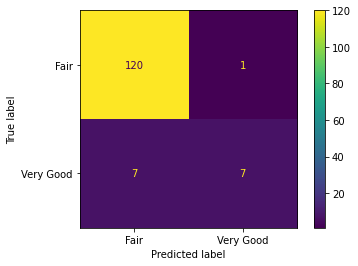

In [30]:
plot_confusion_matrix(best_rf, X_test, y_test)  
plt.show()

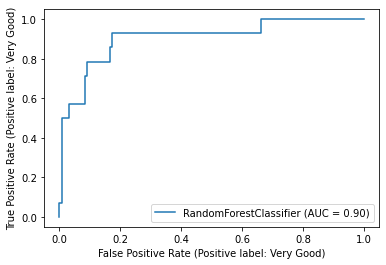

In [31]:
rf_disp = plot_roc_curve(best_rf, X_test, y_test)
plt.show()

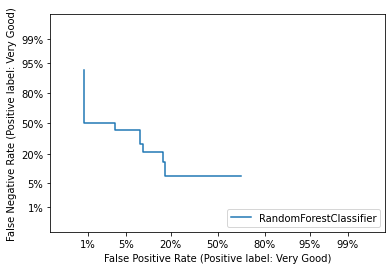

In [32]:
rf_disp = metrics.plot_det_curve(best_rf, X_test, y_test)  
plt.show() 